# 4.2
## Imports

In [63]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import scikit_posthocs as sp

### Obter série de anos

In [64]:
seed_value_1 = 100
years = pd.Series([i for i in range(1900, 2021)])
sampleyears1 = years.sample(n=30, replace=False, random_state=seed_value_1)

seed_value_2 = 55
sampleyears2 = years.sample(n=12, replace=False, random_state=seed_value_2)

seed_value_3 = 85
sampleyears3 = years.sample(n=12, replace=False, random_state=seed_value_3)

## Ler os dados

In [65]:
dados_lidos = pd.read_csv("CO_data.csv")

## Inspecionar os dados lidos

Nota: A análise destes dados já foi realizada na primeira parte do trabalho, pelo que nesta parte fica apenas uma "verificação" visual do carregamento dos dados.

In [66]:
dados_lidos.head()

,country,year,population,gdp,cement_co2,co2,coal_co2,energy_per_capita,energy_per_gdp,flaring_co2,gas_co2,methane,nitrous_oxide,oil_co2
0,Afghanistan,1900,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1903,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1904,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filtros

In [67]:
# Definição das condições de filtragem.
condicao_anos = dados_lidos.year.isin(list(sampleyears1))
condicao_anos_2 = dados_lidos.year.isin(list(sampleyears2))
condicao_anos_PT = dados_lidos.year.isin(list(sampleyears2))
condicao_anos_HU = dados_lidos.year.isin(list(sampleyears3))
condicao_2_paises = dados_lidos.country.isin(["Hungary", "Portugal"])
condicao_PT = dados_lidos.country == "Portugal"
condicao_HU = dados_lidos.country == "Hungary"


## 4.2.1

### Obter dados dos anos pretendidos para Portugal e Hungria

Vamos realizar a filtragem das linhas e colunas de uma única vez, pelo que precisamos de preparar os filtros previamente.
Optámos também por ter os dados em 2 datasets separados por País, neste caso não existe vantagem em ter apenas um único dataset para todos os dados. 

### Extrair dos dados lidos, os dados de trabalho de acordo com as condições de filtro.

Optámos por remover os registos que tenham valores ``NaN`` em qualquer uma das colunas.

In [68]:
# Filtrar
dados_extraidos = dados_lidos.loc[condicao_2_paises & condicao_anos, ["year", "gdp", "country"]]
# Alterar tabela
dados_trabalho = dados_extraidos.pivot_table(values=["gdp"], index=["year"], columns=["country"])
# Eliminar os NaN
dados_trabalho.dropna(inplace=True)
# Ajustar o index
dados_trabalho = dados_trabalho.droplevel(0, axis=1)

#### Confirmar o nosso dataset de trabalho

Pretendemos confirmar que temos as colunas necessárias. E que os valores ``NaN`` foram removidos.

In [69]:
print(f"Existem valores NaN ? {dados_trabalho.isnull().values.any()}")
dados_trabalho

Existem valores NaN ? False


country,Hungary,Portugal
year,,
1925,3.015027e+10,1.470129e+10
1926,2.888782e+10,1.460573e+10
1928,3.279348e+10,1.550832e+10
1929,3.387710e+10,1.719477e+10
1932,3.069479e+10,1.821253e+10
1933,3.348083e+10,1.943744e+10
1935,3.539191e+10,1.919456e+10
1936,3.774896e+10,1.773654e+10
1937,3.691067e+10,2.071620e+10


### Gráficos dos dados

Pela natureza dos dados, consideramos que a melhor de os visualizar é pela utilização de gráficos de dispersão.

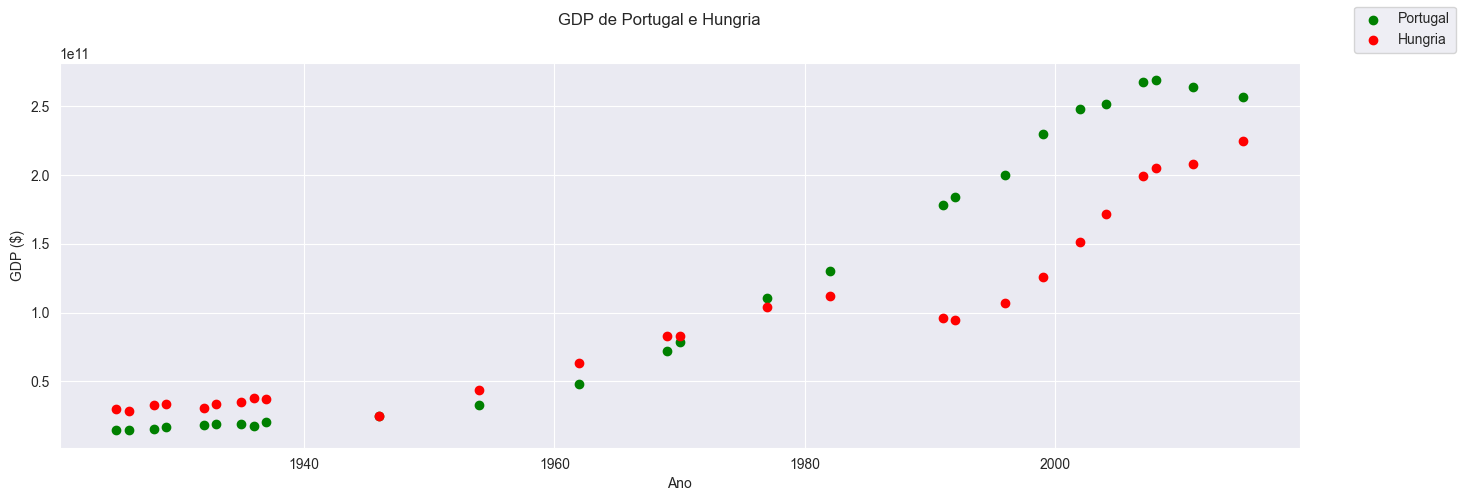

In [70]:
fig_scatter, axes_scatter = plt.subplots(figsize=(16, 5))
fig_scatter.suptitle("GDP de Portugal e Hungria")

plt_pt = axes_scatter.scatter(dados_trabalho.index, dados_trabalho.Portugal, color="green")
plt_hu = axes_scatter.scatter(dados_trabalho.index, dados_trabalho.Hungary, color="red")
_ = axes_scatter.set_xlabel("Ano")
_ = axes_scatter.set_ylabel("GDP ($)")
_ = fig_scatter.legend(("Portugal", "Hungria"), loc="upper right")

# fig_scatter.show()  # Em Jupyter pode apresentar um aviso.

In [71]:
#### Gráficos isolados (alternativa)

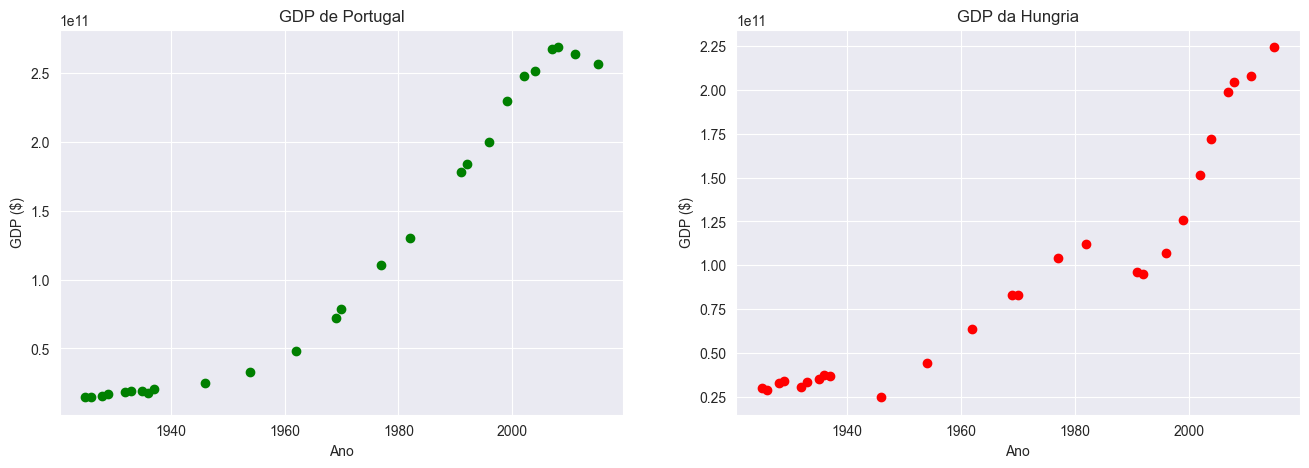

In [72]:
fig_scatter_alt, axes_scatter_alt = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Subplot com os dados de Portugal
plt_pt_alt = axes_scatter_alt[0].scatter(dados_trabalho.index, dados_trabalho.Portugal, color="green")
_ = axes_scatter_alt[0].set_title("GDP de Portugal")
_ = axes_scatter_alt[0].set_xlabel("Ano")
_ = axes_scatter_alt[0].set_ylabel("GDP ($)")

# Subplot com os dados dda Hungria
plt_hu_alt = axes_scatter_alt[1].scatter(dados_trabalho.index, dados_trabalho.Hungary, color="red")
_ = axes_scatter_alt[1].set_title("GDP da Hungria")
_ = axes_scatter_alt[1].set_xlabel("Ano")
_ = axes_scatter_alt[1].set_ylabel("GDP ($)")

# fig_scatter_alt.show()  # Em Jupyter pode apresentar um aviso.

### Cálcular a média amostral

In [73]:
# Média amostral de Portugal.
media_PT = dados_trabalho.Portugal.mean(axis=0)
print(f"Média amostral de Portugal: {media_PT:.3e}")

# Média amostral da Hungria.
media_HU = dados_trabalho.Hungary.mean(axis=0)
print(f"Média amostral da Hungria: {media_HU:.3e}")

Média amostral de Portugal: 1.154e+11
Média amostral da Hungria: 9.219e+10


### Normalidade

Este teste podia ser dispensado porque a amostra é de 30 valores, que é o limite para a utilização do teste *t-student*.
Para que o teste funcione foi necessário fazer a opçao de omitir os valores ``NaN`` usando ``nan_policy="omit"``.

In [74]:
statval_PT, p_value_PT = stats.normaltest(dados_trabalho.Portugal,  nan_policy="omit")
print(f"Portugal - pvalue: {p_value_PT:.3}")

statval_HU, p_value_HU = stats.normaltest(dados_trabalho.Hungary, nan_policy="omit")
print(f"Hungria - pvalue: {p_value_HU:.3}")

Portugal - pvalue: 0.00032
Hungria - pvalue: 0.17


Como o *p-value* de Portugal é inferior a 5% os dados não seguem distribuição normal.
Como o *p-value* da Hungria é superior a 5% os dados seguem distribuição normal. 

### Teste

As amostras são emparelhadas, não havendo assim necessidade de testar a variância das mesmas.

Utilizaçao de *t-student* à média, para amostras emparelhadas (dizem respeito aos mesmos anos).

## Hipotese

$$H_0: \bar X_{PT} \geq \bar X_{HU} \quad Vs \quad H_0: \bar X_{PT} < \bar X_{HU}$$

Para que o teste funcione foi necessário fazer a opçao de omitir os valores ``NaN`` usando ``nan_policy="omit"``.
Uma vez que pretendemos testar se o valor do GDP de Portugal é superior, e os respectivos dados são os primeiros dos argumentos a opção correta para a hipótese alternativa é: ``alternative="greater"``.   

In [75]:
resultado = stats.ttest_rel(dados_trabalho.Portugal, dados_trabalho.Hungary, nan_policy="omit", alternative="greater")
print(f"O valor de pvalue é {resultado.pvalue:.4f}")

O valor de pvalue é 0.0076


Como o valor do *p-value* é inferior a 0,05 rejeitamos a hipotese de que a média do GDP de Portugal é superior à média da Hungria.

## 4.2.2

### Obter dados dos anos pretendidos para Portugal e Hungria

Vamos realizar a filtragem das linhas e colunas de uma única vez, pelo que precisamos de preparar os filtros previamente.
Optámos também por ter os dados em 2 datasets separados por País, neste caso não existe vantagem em ter apenas um único dataset para todos os dados.

In [76]:
# Extrair dos dados lidos, os dados de trabalho de acordo com as condições de filtro.
dados_PT = dados_lidos.loc[condicao_PT & condicao_anos_PT, ["year", "gdp"]]
dados_HU = dados_lidos.loc[condicao_HU & condicao_anos_HU, ["year", "gdp"]]

### Tratar dos NaN

Optámos por remover do dataset os registos com os valores ``NaN``.

In [77]:
dados_PT.dropna(inplace=True)
dados_HU.dropna(inplace=True)

### Normalidade

O teste à normalidade *stats.normaltest()* é para amostras de dimensão superior a 20.
Temos de utilizar *stats.shapiro()* 

In [78]:
shapiro_PT, shapiro_p_value_PT = stats.shapiro(dados_PT["gdp"])
print(f"Portugal - pvalue: {p_value_PT:.3}")

shapiro_HU, shapiro_p_value_HU = stats.shapiro(dados_HU["gdp"])
print(f"Hungria - pvalue: {p_value_HU:.3}")

Portugal - pvalue: 0.00032
Hungria - pvalue: 0.17


Como o *p-value* de Portugal é superior a 5% os dados seguem distribuição normal.
Como o *p-value* da Hungria é superior a 5% os dados seguem distribuição normal. 

### Homogeneidade

Precisamos de averiguar fazer um teste de **Levene** ás variâncias para verificar se são iguais para decidir qual o teste à média a realizar.

$$H_0: \mu_{PT} = \mu_{HU} \quad Vs \quad H_1: \mu_{PT} \neq \mu_{HU}$$ 

In [79]:
resultado_levene = stats.levene(dados_PT["gdp"], dados_HU["gdp"])
print(f"Valor da estatistica de teste: {resultado_levene.statistic:.3} \np-value: {resultado_levene.pvalue:.3}")

Valor da estatistica de teste: 0.34 
p-value: 0.567


### Inspecionar dados filtrados

In [80]:
dados_PT.head()

,year,gdp
24465,1909,1.123628e+10
24479,1923,1.461160e+10
24496,1940,1.975545e+10
24497,1941,2.160324e+10
24523,1967,6.502273e+10


In [81]:
dados_HU.head()

,year,gdp
13448,1910,2.436907e+10
13464,1926,2.888782e+10
13484,1946,2.480221e+10
13498,1960,5.806411e+10
13508,1970,8.285109e+10


### Cálcular a média amostral

In [82]:
# Média amostral de Portugal.
media_PT = dados_PT["gdp"].mean(axis=0)
print(f"Média amostral de Portugal: {media_PT:.4e}")

# Média amostral da Hungria.
media_HU = dados_HU["gdp"].mean(axis=0)
print(f"Média amostral da Hungria: {media_HU:.4e}")

Média amostral de Portugal: 1.0705e+11
Média amostral da Hungria: 1.0413e+11


### Normalidade

O teste à normalidade *stats.normaltest()* é para amostras de dimensão superior a 20.
Temos de utilizar *stats.shapiro()* 

In [83]:
statval_PT, p_value_PT = stats.shapiro(dados_PT["gdp"])
print(f"Portugal - pvalue: {p_value_PT:.3}")

statval_HU, p_value_HU = stats.shapiro(dados_HU["gdp"])
print(f"Hungria - pvalue: {p_value_HU:.3}")

Portugal - pvalue: 0.115
Hungria - pvalue: 0.188


Como o *p-value* de Portugal é superior a 5% os dados seguem distribuição normal.
Como o *p-value* da Hungria é superior a 5% os dados seguem distribuição normal. 

### Homogeneidade

Precisamos de averiguar fazer um teste de **Levene** ás variâncias para verificar se são iguais para decidir qual o teste à média a realizar.

$$H_0: \mu_{PT} = \mu_{HU} \quad Vs \quad H_1: \mu_{PT} \neq \mu_{HU}$$ 

In [84]:
resultado_levene = stats.levene(dados_PT["gdp"], dados_HU["gdp"])
print(f"Valor da estatistica de teste: {resultado_levene.statistic:.3} \np-value: {resultado_levene.pvalue:.3}")

Valor da estatistica de teste: 0.34 
p-value: 0.567


Como o *p-value* é superior a 5% não rejeitamos a hipótese nula, ou seja vamos assumir que as variâncias são iguais. 

### Teste à média

#### Hipotese

$$H_0: \bar X_{PT} \geq \bar X_{HU} \quad Vs \quad H_1: \bar X_{PT} < \bar X_{HU}$$

Amostras não emparelhadas (independentes).
Tamanho da amostra é reduzido.
Distribuição normal.
Pela análise do gráfico não parecem existir outliers significativos.

Utilização de **ttest_ind()** com *equal_var=True* à média.

In [85]:
f_stat, p_value = stats.ttest_ind(dados_PT["gdp"], dados_HU["gdp"], equal_var=True)
print(f"Valor da estatistica de teste: {f_stat:.3} \np-value: {p_value:.3}")

Valor da estatistica de teste: 0.0802 
p-value: 0.937


Com o *p-value* do teste de 0,937 não vamos rejeitar a hipótese nula, ou seja aceitamos que a média do **GDP** de Portugal é superior ao **GDP** da Hungria, nas amostras consideradas.

### Exploração de metodologia 

In [86]:
f_stat, p_value = stats.f_oneway(dados_PT["gdp"], dados_HU["gdp"])
print(f"Valor da estatistica de teste: {f_stat:.3} \np-value: {p_value:.3}")

Valor da estatistica de teste: 0.00643 
p-value: 0.937


### Gráfico Boxplot

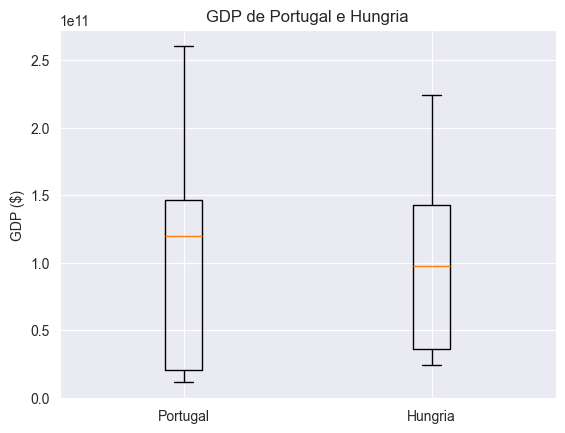

In [87]:
fig_bp, ax_bp = plt.subplots()
_ = ax_bp.boxplot([dados_PT["gdp"], dados_HU["gdp"]], labels=["Portugal", "Hungria"])
_ = ax_bp.set_title("GDP de Portugal e Hungria")
_ = ax_bp.set_ylabel("GDP ($)")

# fig_bp.show()  # Em Jupyter pode apresentar um aviso.

## 4.2.3

### Obter dados dos anos pretendidos

In [88]:
# Lista de cores.
cores = list(mcolors.BASE_COLORS.keys())[:5]
# Lista de paises
paises = ["United States", "Russia", "China", "India", "European Union (27)"]

dados_paises = {}

for pais in paises:
    condicao_pais = dados_lidos.country == pais
    dados_paises[pais] = dados_lidos.loc[condicao_anos & condicao_pais, ["year", "co2"]]

amostras = [dados_paises[pais]["co2"] for pais in dados_paises]

### Gráficos dos dados

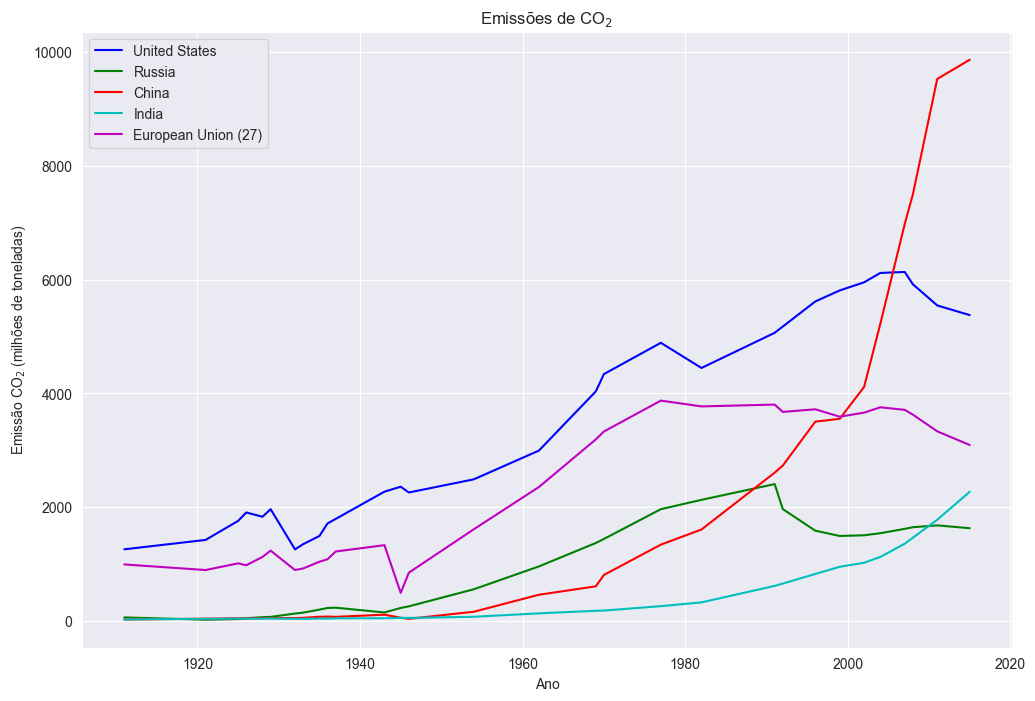

In [89]:
plot_fig_co2, plot_ax_co2 = plt.subplots(figsize=(12, 8))

plot_ax_co2.set_title(r"Emissões de CO$_2$")
plot_ax_co2.set_xlabel("Ano")
plot_ax_co2.set_ylabel(r"Emissão CO$_2$ (milhões de toneladas)")

graficos = []

# Construir as várias "linhas"
for idx, pais in enumerate(paises):
    grafico = plot_ax_co2.plot(
        "year",  # Seria a utilizar para o eixo dos XX.
        "co2",  # Seria a utilizar para o eixo dos YY.
        data=dados_paises[pais],  # Estrutura de dados a utilizar, neste caso 1 DataFrame. 
        color=cores[idx],  # Cor da "linha".
        label=pais,  # O valor "humano" das etiquetas. 
    )
    # Vou guardar as linhas numa lista caso queira mais tarde referênciar as mesmas.
    graficos.append(grafico)

_ = plot_ax_co2.legend(loc="upper left")
# plot_fig_co2.show()  # Em Jupyter pode apresentar um aviso.

### Boxplot

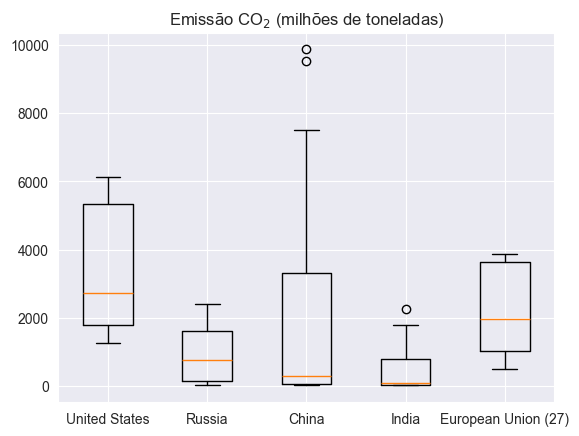

In [90]:
fig_bp_co2, ax_bp_co2 = plt.subplots()
boxplot_co2 = ax_bp_co2.boxplot(amostras, labels=paises)
_ = ax_bp_co2.set_title(r"Emissão CO$_2$ (milhões de toneladas)")
# fig_bp_co2.show()  # Em Jupyter pode apresentar um aviso.

### Testar se as amostras estão emparelhadas

#### Escolha do teste a utilizar

Não usar One-Way ANOVA

Não se verificam algumas das condições necessárias:
- Amostras pequenas (12 valores por país);
- A variável dependente (país) não é continua;
- Condição 2 da página 34 do "TestesParametricosPT.pdf" não sei explicar;
- As observações são relacionadas (mesmos anos);
- Existem *outliers significativos*, nas amostras da China e India;


Para tal vamos utilizar o teste de Friedman: *scipy.stats.friedmanchisquare()*

Várias amostras (mais de 2) dependentes (anos diferentes);
A variável aleatória (emissão de $CO_2$) é quantitativa;

$$H_0: A distribuição das emissões de CO_2 dos vários países é igual$$
$$H_1: A distribuiçao das emissões de CO_2 dos vários países não é igual$$

In [91]:
resultado = stats.friedmanchisquare(*amostras)
print(f"Valor da estatistica: {resultado.statistic:.4}\np-value: {resultado.pvalue:.4e}")

Valor da estatistica: 93.12
p-value: 2.8608e-19


Como o valor de *p-value* é baixo (próximo de 0) rejeitamos a hipótese nula, ou seja as emissões são diferentes. 

### Testes Post Hoc

Existem várias opções de teste *Post Hoc* possíveis para o teste de Friedman.

In [92]:
sp.posthoc_nemenyi_friedman(a=amostras)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.036070,0.059195,0.052286,0.092960,0.040941,0.014032,0.009103,0.012165,0.016154,0.027763
1,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.036070,0.059195,0.052286,0.092960,0.040941,0.014032,0.009103,0.012165,0.016154,0.027763
2,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.174275,0.249959,0.229468,0.346353,0.190745,0.084289,0.059195,0.075250,0.092960,0.142111
3,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.157775,0.229468,0.209587,0.319797,0.174275,0.075250,0.052286,0.066856,0.084289,0.127786
4,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.346353,0.460752,0.432895,0.560392,0.374862,0.190745,0.142111,0.174275,0.209587,0.295930
5,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,...,0.609096,0.706499,0.682147,0.803903,0.633448,0.432895,0.346353,0.404004,0.460752,0.560392
6,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,...,0.092960,0.142111,0.127786,0.209587,0.104316,0.040941,0.027763,0.036070,0.046299,0.075250
7,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,...,0.142111,0.209587,0.190745,0.295930,0.157775,0.066856,0.046299,0.059195,0.075250,0.116713
8,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,...,0.560392,0.657797,0.633448,0.755200,0.584743,0.374862,0.295930,0.346353,0.404004,0.511691
9,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,...,0.633448,0.730847,0.706499,0.828254,0.657797,0.460752,0.374862,0.432895,0.487045,0.584743


In [93]:
sp.posthoc_conover_friedman(a=amostras)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000e+00,1.000000e+00,1.749210e-01,2.075428e-01,3.404914e-02,2.283514e-03,4.370076e-01,2.444281e-01,4.146438e-03,1.677562e-03,...,2.260584e-18,1.876896e-17,1.105997e-17,1.551739e-16,3.838162e-18,5.560009e-20,1.138958e-20,3.276707e-20,9.436427e-20,7.840444e-19
1,1.000000e+00,1.000000e+00,1.749210e-01,2.075428e-01,3.404914e-02,2.283514e-03,4.370076e-01,2.444281e-01,4.146438e-03,1.677562e-03,...,2.260584e-18,1.876896e-17,1.105997e-17,1.551739e-16,3.838162e-18,5.560009e-20,1.138958e-20,3.276707e-20,9.436427e-20,7.840444e-19
2,1.749210e-01,1.749210e-01,1.000000e+00,9.225024e-01,4.370076e-01,8.191803e-02,5.597080e-01,8.457434e-01,1.215067e-01,6.651259e-02,...,3.632280e-15,2.925496e-14,1.739147e-14,2.315105e-13,6.127698e-15,9.156395e-17,1.876896e-17,5.400675e-17,1.551739e-16,1.273170e-15
3,2.075428e-01,2.075428e-01,9.225024e-01,1.000000e+00,3.820581e-01,6.651259e-02,6.268453e-01,9.225024e-01,1.001412e-01,5.360343e-02,...,2.151295e-15,1.739147e-14,1.032823e-14,1.382937e-13,3.632280e-15,5.400675e-17,1.105997e-17,3.184289e-17,9.156395e-17,7.529492e-16
4,3.404914e-02,3.404914e-02,4.370076e-01,3.820581e-01,1.000000e+00,3.316188e-01,1.749210e-01,3.316188e-01,4.370076e-01,2.857512e-01,...,2.315105e-13,1.791742e-12,1.076768e-12,1.349368e-11,3.870218e-13,6.127698e-15,1.273170e-15,3.632280e-15,1.032823e-14,8.250179e-14
5,2.283514e-03,2.283514e-03,8.191803e-02,6.651259e-02,3.316188e-01,1.000000e+00,2.100074e-02,5.360343e-02,8.457434e-01,9.225024e-01,...,3.659201e-11,2.618240e-10,1.606719e-10,1.797237e-09,6.006034e-11,1.076768e-12,2.315105e-13,6.460466e-13,1.791742e-12,1.349368e-11
6,4.370076e-01,4.370076e-01,5.597080e-01,6.268453e-01,1.749210e-01,2.100074e-02,1.000000e+00,6.972694e-01,3.404914e-02,1.631369e-02,...,1.551739e-16,1.273170e-15,7.529492e-16,1.032823e-14,2.628491e-16,3.838162e-18,7.840444e-19,2.260584e-18,6.515901e-18,5.400675e-17
7,2.444281e-01,2.444281e-01,8.457434e-01,9.225024e-01,3.316188e-01,5.360343e-02,6.972694e-01,1.000000e+00,8.191803e-02,4.288009e-02,...,1.273170e-15,1.032823e-14,6.127698e-15,8.250179e-14,2.151295e-15,3.184289e-17,6.515901e-18,1.876896e-17,5.400675e-17,4.450039e-16
8,4.146438e-03,4.146438e-03,1.215067e-01,1.001412e-01,4.370076e-01,8.457434e-01,3.404914e-02,8.191803e-02,1.000000e+00,7.704406e-01,...,1.349368e-11,9.835257e-11,6.006034e-11,6.898090e-10,2.224441e-11,3.870218e-13,8.250179e-14,2.315105e-13,6.460466e-13,4.935454e-12
9,1.677562e-03,1.677562e-03,6.651259e-02,5.360343e-02,2.857512e-01,9.225024e-01,1.631369e-02,4.288009e-02,7.704406e-01,1.000000e+00,...,6.006034e-11,4.255525e-10,2.618240e-10,2.888148e-09,9.835257e-11,1.791742e-12,3.870218e-13,1.076768e-12,2.976384e-12,2.224441e-11


In [94]:
sp.posthoc_siegel_friedman(a=amostras)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,0.615038,0.640519,0.429374,0.250361,0.773830,0.666430,0.281198,0.235861,...,0.000121,0.000216,0.000187,0.000376,0.000140,0.000042,0.000026,0.000036,0.000049,0.000090
1,1.000000,1.000000,0.615038,0.640519,0.429374,0.250361,0.773830,0.666430,0.281198,0.235861,...,0.000121,0.000216,0.000187,0.000376,0.000140,0.000042,0.000026,0.000036,0.000049,0.000090
2,0.615038,0.615038,1.000000,0.971345,0.773830,0.517904,0.829357,0.942728,0.565469,0.494923,...,0.000836,0.001389,0.001225,0.002263,0.000951,0.000328,0.000216,0.000286,0.000376,0.000644
3,0.640519,0.640519,0.971345,1.000000,0.746476,0.494923,0.857462,0.971345,0.541426,0.472498,...,0.000734,0.001225,0.001080,0.002007,0.000836,0.000286,0.000187,0.000248,0.000328,0.000564
4,0.429374,0.429374,0.773830,0.746476,1.000000,0.719438,0.615038,0.719438,0.773830,0.692746,...,0.002263,0.003619,0.003224,0.005676,0.002550,0.000951,0.000644,0.000836,0.001080,0.001777
5,0.250361,0.250361,0.517904,0.494923,0.719438,1.000000,0.388629,0.472498,0.942728,0.971345,...,0.007058,0.010760,0.009701,0.016097,0.007857,0.003224,0.002263,0.002869,0.003619,0.005676
6,0.773830,0.773830,0.829357,0.857462,0.615038,0.388629,1.000000,0.885750,0.429374,0.369171,...,0.000376,0.000644,0.000564,0.001080,0.000431,0.000140,0.000090,0.000121,0.000162,0.000286
7,0.666430,0.666430,0.942728,0.971345,0.719438,0.472498,0.885750,1.000000,0.517904,0.450644,...,0.000644,0.001080,0.000951,0.001777,0.000734,0.000248,0.000162,0.000216,0.000286,0.000493
8,0.281198,0.281198,0.565469,0.541426,0.773830,0.942728,0.429374,0.517904,1.000000,0.914184,...,0.005676,0.008735,0.007857,0.013192,0.006333,0.002550,0.001777,0.002263,0.002869,0.004543
9,0.235861,0.235861,0.494923,0.472498,0.692746,0.971345,0.369171,0.450644,0.914184,1.000000,...,0.007857,0.011921,0.010760,0.017750,0.008735,0.003619,0.002550,0.003224,0.004057,0.006333


In [95]:
sp.posthoc_miller_friedman(a=amostras)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.986706,0.992841,0.991597,0.996370,0.988550,0.965648,0.950849,0.961170,0.969705,0.982267
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.986706,0.992841,0.991597,0.996370,0.988550,0.965648,0.950849,0.961170,0.969705,0.982267
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.998840,0.999503,0.999381,0.999803,0.999055,0.995673,0.992841,0.994863,0.996370,0.998274
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.998582,0.999381,0.999234,0.999750,0.998840,0.994863,0.991597,0.993924,0.995673,0.997908
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999803,0.999928,0.999906,0.999976,0.999845,0.999055,0.998274,0.998840,0.999234,0.999684
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999987,0.999996,0.999995,0.999999,0.999990,0.999906,0.999803,0.999879,0.999928,0.999976
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.996370,0.998274,0.997908,0.999234,0.996967,0.988550,0.982267,0.986706,0.990173,0.994863
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.998274,0.999234,0.999055,0.999684,0.998582,0.993924,0.990173,0.992841,0.994863,0.997476
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999976,0.999993,0.999990,0.999998,0.999982,0.999845,0.999684,0.999803,0.999879,0.999958
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.999990,0.999997,0.999996,0.999999,0.999993,0.999928,0.999845,0.999906,0.999945,0.999982
